In [1]:
import neurokit2 as nk
import numpy as np

In [2]:
duration=20
sampling_rate = 125

In [3]:
ppg = nk.ppg_simulate(heart_rate=75, duration=duration, sampling_rate=sampling_rate)

In [4]:
ppg_clean = nk.ppg_clean(ppg, sampling_rate=sampling_rate, method='Elgendi')

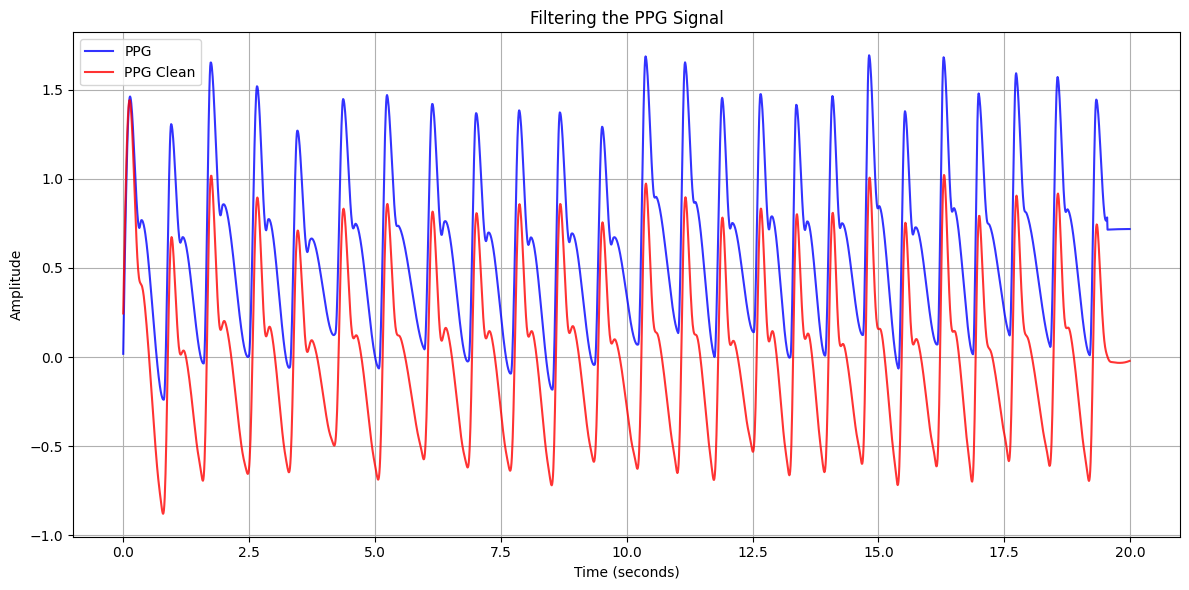

In [5]:
import matplotlib.pyplot as plt

t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

plt.figure(figsize=(12, 6))

# Plot the PPG signal
plt.plot(t, ppg, label='PPG', color='blue', alpha=0.8)

# Plot the PPG signal
plt.plot(t, ppg_clean, label='PPG Clean', color='red', alpha=0.8)

plt.title('Filtering the PPG Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
#plt.xlim(12.5, 15)
plt.tight_layout()
plt.show()

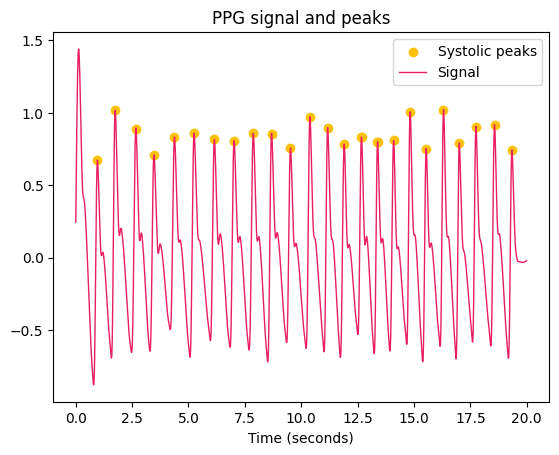

In [6]:
peaks, info = nk.ppg_peaks(ppg_clean, sampling_rate=sampling_rate, method="charlton", show=True)

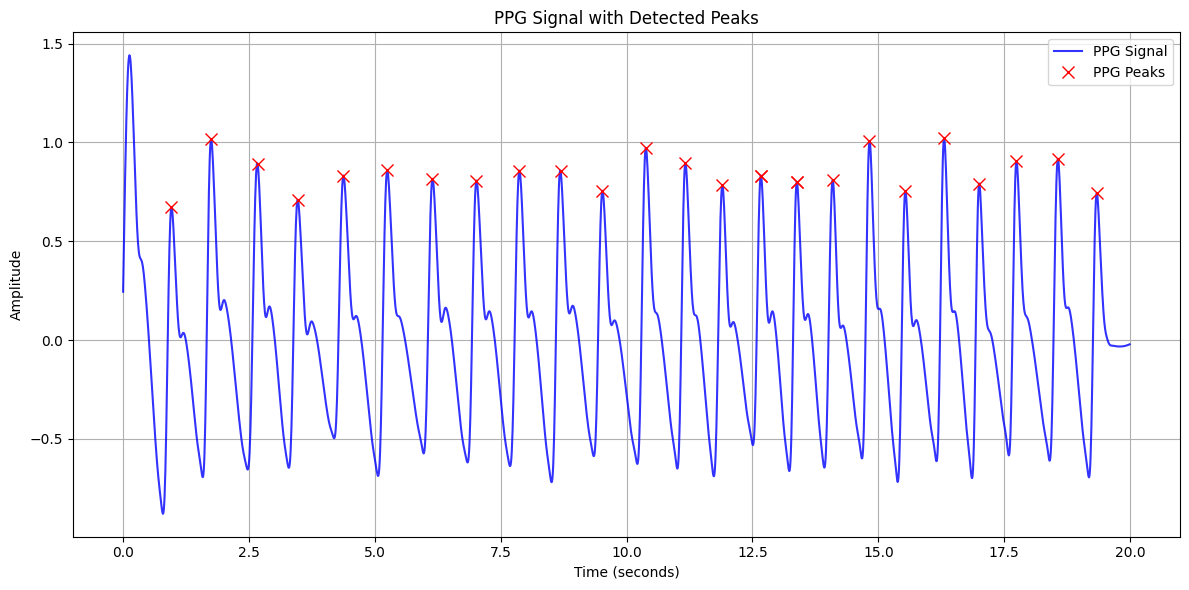

Number of detected peaks: 26


In [7]:
import matplotlib.pyplot as plt

t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
peak_indices = np.where(peaks['PPG_Peaks'] == 1)[0]

plt.figure(figsize=(12, 6))

# Plot the PPG signal
plt.plot(t, ppg_clean, label='PPG Signal', color='blue', alpha=0.8)

# Plot the peaks
# We plot the peak value of the PPG signal at the corresponding peak index
plt.plot(t[peak_indices], ppg_clean[peak_indices], 'rx', markersize=8, label='PPG Peaks')

plt.title('PPG Signal with Detected Peaks')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
#plt.xlim(12.5, 15)
plt.tight_layout()
plt.show()

print(f"Number of detected peaks: {len(peak_indices)}")

## Quality assessment

In [8]:
sampling_rate

125

In [9]:
peak_indices = np.where(peaks['PPG_Peaks'] == 1)[0]
quality = nk.ppg_quality(ppg_clean, peaks=peak_indices, sampling_rate=sampling_rate, method="templatematch")

0.23674281512629533


In [10]:
quality

array([0.99619992, 0.99619992, 0.99619992, ..., 0.99925222, 0.99925222,
       0.99925222])

In [11]:
ppg = nk.ppg_simulate(duration=30, sampling_rate=300, heart_rate=80)
ppg_cleaned = nk.ppg_clean(ppg, sampling_rate=300)
quality = nk.ppg_quality(ppg_cleaned, sampling_rate=300, method="templatematch")

0.3830040290665145


In [12]:
quality

array([0.98528401, 0.98528401, 0.98528401, ..., 0.99696912, 0.99696912,
       0.99696912])

In [13]:
sampling_rate = 100
ppg = nk.ppg_simulate(duration=30, sampling_rate=sampling_rate, heart_rate=80)
ppg_cleaned = nk.ppg_clean(ppg, sampling_rate=sampling_rate)
_, peaks = nk.ppg_peaks(ppg_cleaned, sampling_rate=sampling_rate)
peaks = peaks["PPG_Peaks"]
heartbeats = nk.signal_cyclesegment(ppg_cleaned, peaks, sampling_rate=sampling_rate)

0.3823802539092401


In [14]:
heartbeats

({np.str_('1'):              Signal  Index Label
  -0.382380 -0.117507     52     1
  -0.372318 -0.152883     53     1
  -0.362255 -0.188292     54     1
  -0.352192 -0.223660     55     1
  -0.342130 -0.258908     56     1
  ...             ...    ...   ...
   0.342130 -0.112971    124     1
   0.352192 -0.137493    125     1
   0.362255 -0.163108    126     1
   0.372318 -0.189736    127     1
   0.382380 -0.217268    128     1
  
  [77 rows x 3 columns],
  np.str_('2'):              Signal  Index Label
  -0.382380 -0.245579    129     2
  -0.372318 -0.274528    130     2
  -0.362255 -0.303967    131     2
  -0.352192 -0.333739    132     2
  -0.342130 -0.363679    133     2
  ...             ...    ...   ...
   0.342130  0.047617    201     2
   0.352192  0.026203    202     2
   0.362255  0.003816    203     2
   0.372318 -0.019513    204     2
   0.382380 -0.043727    205     2
  
  [77 rows x 3 columns],
  np.str_('3'):              Signal  Index Label
  -0.382380 -0.174356    21

0.3835154126733425


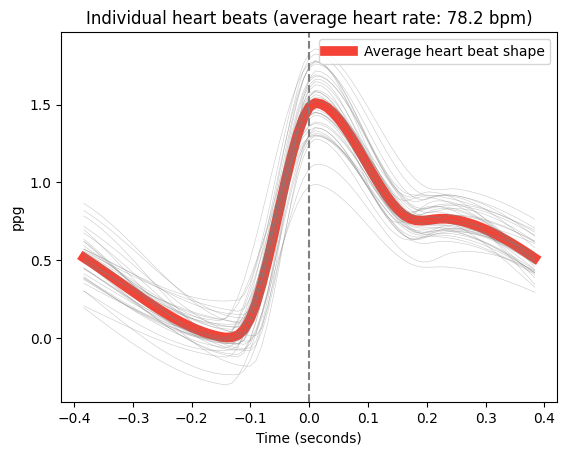

In [15]:
ppg = nk.ppg_simulate(duration=30, sampling_rate=100, heart_rate=80)
ppg_epochs = nk.ppg_segment(ppg, sampling_rate=100, show=True)